Importing the libraries


In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

Load and Prepare Data


In [286]:
df = pd.read_csv('D:/project_ML/tehran_house_price_prediction/housePrice.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000,116667
3475,83,2,True,True,True,Niavaran,6800000000,226667
3476,75,2,False,False,False,Parand,365000000,12167
3477,105,2,True,True,True,Dorous,5600000000,186667


In [287]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333


In [288]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2521,83,2,True,True,False,Damavand,1550000000,51667
3315,120,2,True,True,True,NaN,1440000000,48000
817,85,2,True,True,True,Qalandari,4500000000,150000
91,148,3,True,True,True,Daryan No,5990000000,199667
2972,135,2,True,True,True,Mirdamad,9970000000,332333


Explore the data (EDA)


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [290]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [291]:
df.describe()

,Room,Price,Price(USD)
count,3479,3479,3479
mean,2,5359022711,178634
std,1,8099934524,269998
min,0,3600000,120
25%,2,1418250000,47275
50%,2,2900000000,96667
75%,2,6000000000,200000
max,5,92400000000,3080000


In [292]:
df.shape

(3479, 8)

In [293]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [294]:
df.dropna(inplace=True)

In [295]:
df.shape

(3456, 8)

In [296]:
df['Elevator'].value_counts(normalize=True)*100

Elevator
True    79
False   21
Name: proportion, dtype: float64

In [297]:
pd.crosstab(df.Elevator, df.Room)

Room,0,1,2,3,4,5
Elevator,,,,,,
False,8,282,352,49,17,27
True,2,387,1591,682,53,6


In [298]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [299]:
below_85 = df[ df.Area <= 85 ]
len(below_85)

1522

In [300]:
df[ df.Area <= 85 ]["Parking"].value_counts( )

Parking
True     1104
False     418
Name: count, dtype: int64

In [301]:
round(df.Price.mean())

5379956887

In [302]:
df.groupby( 'Room' )['Price'].mean()

Room
0    7860500000
1    1707480867
2    3330303037
3   10938692886
4   25600328571
5   33734393939
Name: Price, dtype: float64

In [303]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [304]:
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [305]:
df2 = df.copy()

In [306]:
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)

C:\Users\Sorena Pardaz\AppData\Local\Temp\ipykernel_6260\2295878126.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1,850,000,000' '1,850,000,000' '550,000,000' ... '365,000,000'
 '5,600,000,000' '360,000,000']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)


In [307]:
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000",61667
1,60,1,True,True,True,Shahran,"1,850,000,000",61667
2,79,2,True,True,True,Pardis,"550,000,000",18333
3,95,2,True,True,True,Shahrake Qods,"902,500,000",30083
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000",233333
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000",116667
3475,83,2,True,True,True,Niavaran,"6,800,000,000",226667
3476,75,2,False,False,False,Parand,"365,000,000",12167
3477,105,2,True,True,True,Dorous,"5,600,000,000",186667


In [308]:
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [309]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [310]:
len(df.Address.unique())

192

Visualizaion

<Figure size 800x500 with 0 Axes>

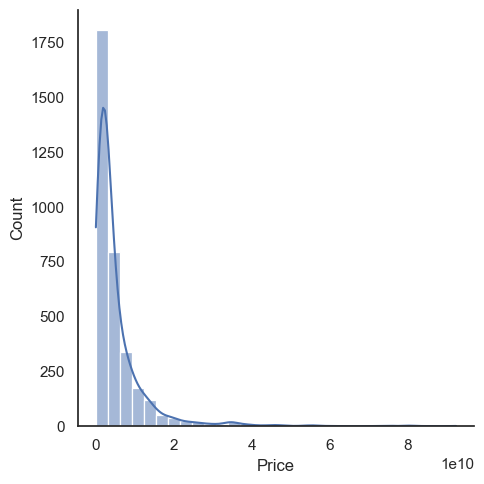

In [311]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )

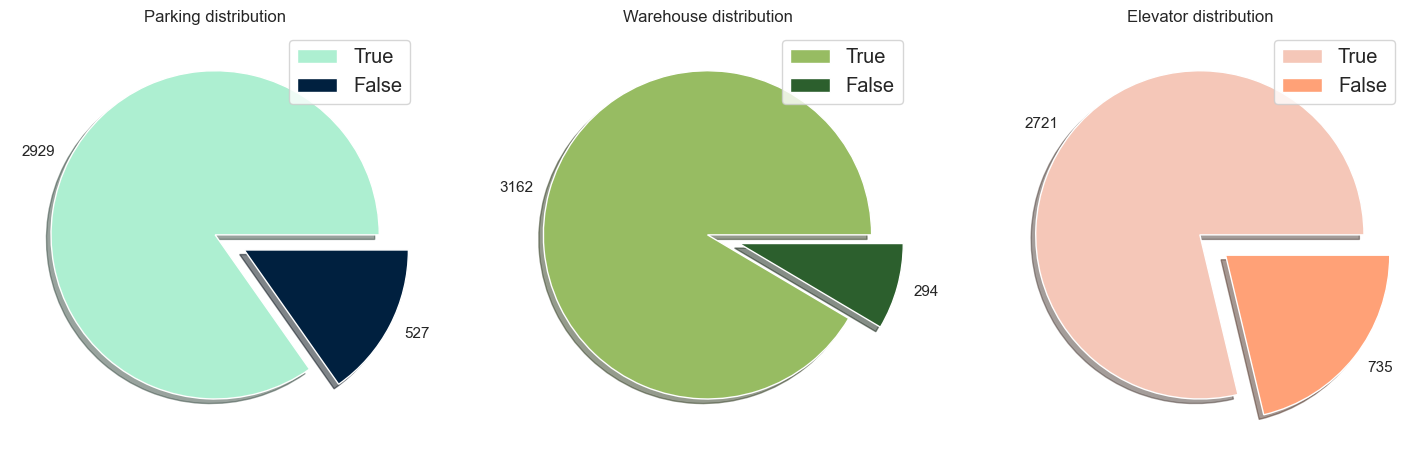

In [312]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

In [313]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]
df3

Address
Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Name: count, dtype: int64

Text(0, 0.5, 'Number of flats in location')

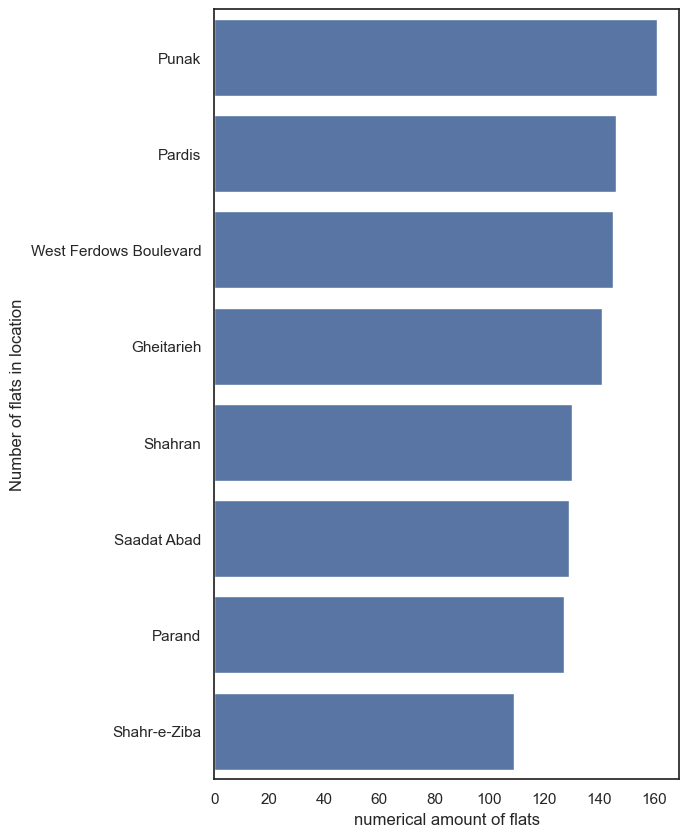

In [314]:
fig, ax = plt.subplots(figsize=(6, 10))
sns.barplot(x=df3.values, y = df3.index , ax=ax)
plt.xlabel('numerical amount of flats')
plt.ylabel('Number of flats in location')

In [315]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [316]:
df.sort_values('Price', ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


Preprocessing

In [317]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000,116667
3475,83,2,True,True,True,Niavaran,6800000000,226667
3476,75,2,False,False,False,Parand,365000000,12167
3477,105,2,True,True,True,Dorous,5600000000,186667


Model Building

In [318]:
boolean_features = ['Parking', 'Warehouse', 'Elevator']
df[boolean_features] = df[boolean_features].astype('int64')
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1850000000,61667
1,60,1,1,1,1,Shahran,1850000000,61667
2,79,2,1,1,1,Pardis,550000000,18333
3,95,2,1,1,1,Shahrake Qods,902500000,30083
4,123,2,1,1,1,Shahrake Gharb,7000000000,233333
5,70,2,1,1,0,North Program Organization,2050000000,68333
6,87,2,1,1,1,Pardis,600000000,20000
7,59,1,1,1,1,Shahran,2150000000,71667
8,54,2,1,1,0,Andisheh,493000000,16433
9,71,1,1,1,1,West Ferdows Boulevard,2370000000,79000


In [319]:
df = df.drop(columns=['Price(USD)'])

In [320]:
df4 = df.drop(columns=['Address'])

In [321]:
df4.skew()

Area        44
Room         1
Parking     -2
Warehouse   -3
Elevator    -1
Price        5
dtype: float64

<Axes: xlabel='Price'>

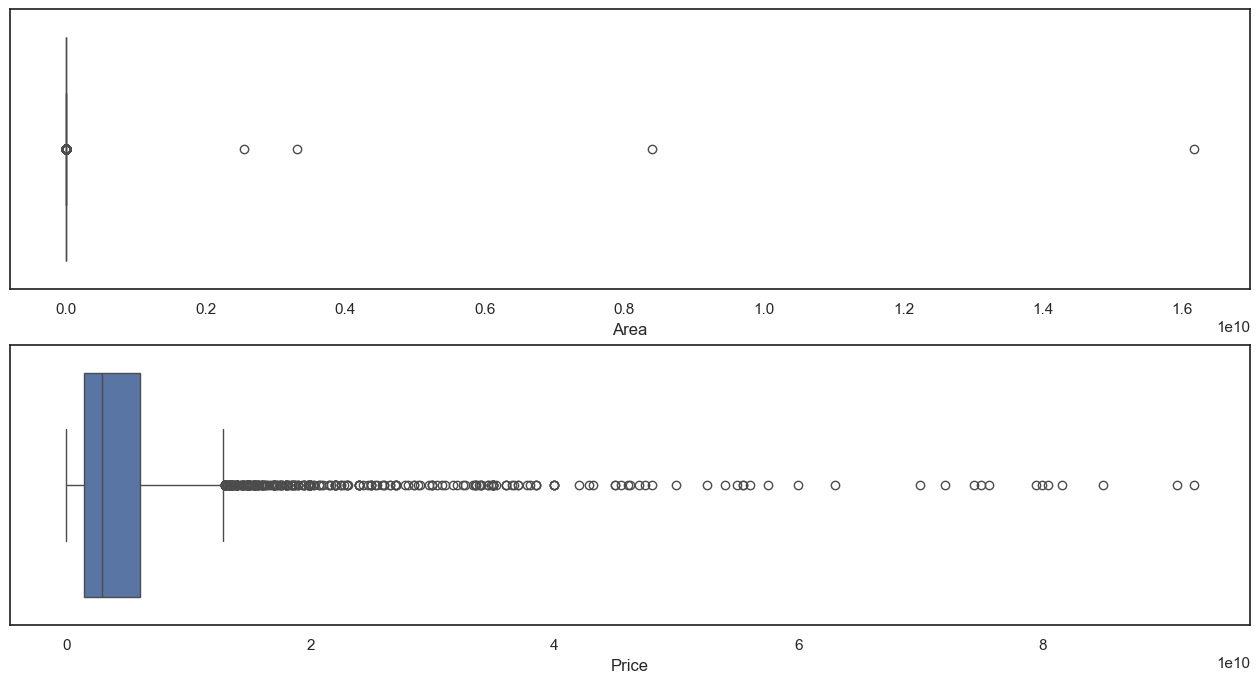

In [322]:
plt.figure(figsize=(16, 8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

In [323]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [324]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [325]:
total_outliers

array([  25,   58,   83,  101,  145,  159,  160,  166,  173,  176,  187,
        189,  193,  195,  196,  200,  210,  215,  218,  220,  226,  234,
        235,  238,  260,  262,  264,  269,  270,  281,  283,  284,  297,
        299,  315,  327,  329,  338,  339,  340,  342,  343,  344,  345,
        346,  347,  348,  349,  351,  353,  355,  356,  362,  363,  364,
        394,  410,  411,  412,  429,  430,  436,  439,  458,  463,  496,
        512,  514,  515,  516,  525,  534,  547,  553,  559,  564,  565,
        566,  567,  569,  572,  576,  577,  578,  579,  582,  599,  600,
        610,  627,  635,  638,  640,  641,  648,  649,  652,  706,  712,
        721,  729,  730,  731,  738,  739,  740,  753,  765,  792,  803,
        804,  816,  819,  828,  834,  836,  849,  872,  876,  891,  955,
        956,  962, 1005, 1006, 1012, 1021, 1022, 1028, 1031, 1033, 1103,
       1110, 1114, 1128, 1136, 1137, 1148, 1174, 1175, 1228, 1230, 1231,
       1232, 1258, 1260, 1265, 1266, 1270, 1282, 12

In [326]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3500000000
3475,83,2,1,1,1,Niavaran,6800000000
3476,75,2,0,0,0,Parand,365000000
3477,105,2,1,1,1,Dorous,5600000000


In [327]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index=True, right_index=True)
df_final.drop(columns='Address', inplace = True)
df_final

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,902500000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,1,1,1,7000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3475,83,2,1,1,1,6800000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,75,2,0,0,0,365000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3477,105,2,1,1,1,5600000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [328]:
x = df_final.drop(columns='Price')
y = df_final['Price']
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(f"shape of x train: {x_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {x_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2764, 197)
shape of y train: (2764,)
shape of x test: (692, 197)
shape of y train: (692,)


In [329]:
def parameter_finder (model, parameters):
    
    start = time.time()
    
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    grid_fit = grid.fit(x_train, y_train)
    y_train_pred = grid_fit.predict(x_train)
    y_pred = grid_fit.predict(x_test)
    
    train_score =grid_fit.score(x_train, y_train)
    test_score = grid_fit.score(x_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
       
    return train_score, test_score, RMSE

In [330]:
lr = LinearRegression(n_jobs = -1)
lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})

The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 60.40% for LinearRegression model.
(R2 score) in the testing set is 53.35% for LinearRegression model.
RMSE is 6,357,973,658.510941 for LinearRegression model.
--------------------
Runtime of the program is: 0.30


In [331]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 0.0001, 'solver': 'auto'}
--------------------
(R2 score) in the training set is 60.40% for Ridge model.
(R2 score) in the testing set is 53.36% for Ridge model.
RMSE is 6,357,931,966.932677 for Ridge model.
--------------------
Runtime of the program is: 1.56


d:\project_ML\project_ml\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.41775e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [332]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Lasso model.
(R2 score) in the testing set is 53.35% for Lasso model.
RMSE is 6,357,953,517.829563 for Lasso model.
--------------------
Runtime of the program is: 12.44


d:\project_ML\project_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.318e+22, tolerance: 1.676e+19
  model = cd_fast.enet_coordinate_descent(


In [333]:
eln = ElasticNet(random_state = 1) # Linear regression with combined L1 and L2 priors as regularizer.
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
             'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7],
             'selection': ['cyclic', 'random']}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.7, 'selection': 'random'}
--------------------
(R2 score) in the training set is 59.51% for ElasticNet model.
(R2 score) in the testing set is 55.36% for ElasticNet model.
RMSE is 6,219,838,182.729826 for ElasticNet model.
--------------------
Runtime of the program is: 51.63


In [334]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'splitter': ['best', 'random'],
             'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3],
             'max_features': ['sqrt', 'log2']}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
--------------------
(R2 score) in the training set is 92.05% for DecisionTreeRegressor model.
(R2 score) in the testing set is 73.30% for DecisionTreeRegressor model.
RMSE is 4,809,960,460.279548 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 24.05


In [335]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size': [20, 30, 40]}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 60.21% for KNeighborsRegressor model.
(R2 score) in the testing set is 64.30% for KNeighborsRegressor model.
RMSE is 5,562,593,341.712968 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 26.45


In [336]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, knr_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, knr_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, knr_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'KNeighborsRegressor'])

models_score

,Training score,Testing score,RMSE
LinearRegression,1,1,6357973659
Ridge,1,1,6357931967
Lasso,1,1,6357953518
ElasticNet,1,1,6219838183
DecisionTreeRegressor,1,1,4809960460
KNeighborsRegressor,1,1,5562593342


C:\Users\Sorena Pardaz\AppData\Local\Temp\ipykernel_6260\1253074082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')


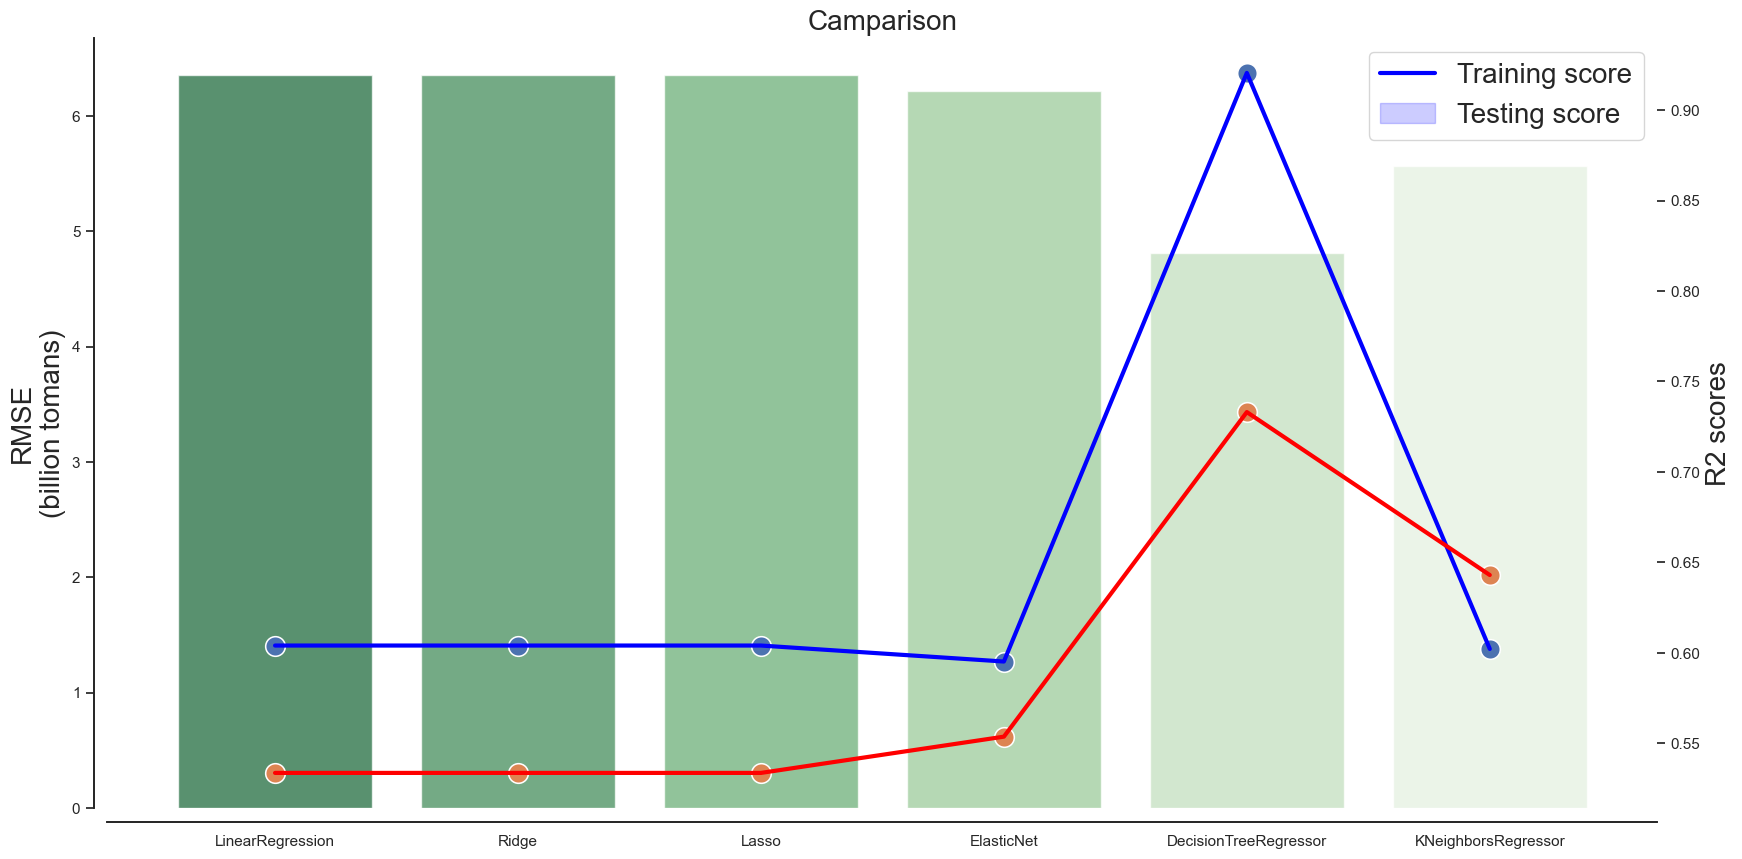

In [337]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')

ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)


sns.despine(offset = 10)

plt.show()